In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

https://www.kaggle.com/c/nyc-taxi-trip-duration
https://www.kaggle.com/tmdb/tmdb-movie-metadata
https://www.kaggle.com/drgilermo/nba-players-stats

### New York City Taxi Trip Duration
https://www.kaggle.com/c/nyc-taxi-trip-duration
Data fields
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

In [18]:
df = pd.read_csv('train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [12]:
(
    print(df.vendor_id.unique(), df.passenger_count.unique())
)

[2 1] [1 6 4 2 3 5 0 7 9 8]


In [22]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [25]:
df = df[['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']]

In [26]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1458644 non-null  object        
 1   pickup_datetime    1458644 non-null  datetime64[ns]
 2   dropoff_datetime   1458644 non-null  datetime64[ns]
 3   passenger_count    1458644 non-null  int64         
 4   pickup_longitude   1458644 non-null  float64       
 5   pickup_latitude    1458644 non-null  float64       
 6   dropoff_longitude  1458644 non-null  float64       
 7   dropoff_latitude   1458644 non-null  float64       
 8   trip_duration      1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 100.2+ MB
None


,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435


In [31]:
df['duration'] = pd.to_timedelta(df.trip_duration, unit='s')

In [32]:
df.groupby(df.pickup_datetime.dt.hour).agg({'duration':'describe'})

duration                                           \
                   count            mean             std      min   
pickup_datetime                                                     
0                  53248 00:15:36.657301 02:29:59.087287 00:00:01   
1                  38571 00:15:03.087112 01:02:13.570656 00:00:02   
2                  27972 00:14:50.076934 01:06:43.839901 00:00:01   
3                  20895 00:14:50.070878 01:06:01.003484 00:00:02   
4                  15792 00:15:21.976443 01:06:16.500020 00:00:01   
5                  15002 00:13:42.298960 00:49:12.808616 00:00:01   
6                  33248 00:13:17.434943 03:26:53.137559 00:00:02   
7                  55600 00:13:51.758345 00:42:02.785415 00:00:02   
8                  67053 00:15:24.559199 00:46:52.643178 00:00:02   
9                  67663 00:15:33.528915 00:46:35.104833 00:00:01   
10                 65437 00:15:33.367605 00:45:34.789525 00:00:01   
11                 68476 00:16:06.430282 00:46:50.298408 00:00:01   
12                 71873 00:16:33.533079 00:52:49.627444 00:00:01   
13                 71473 00:17:12.246358 00:56:37.886624 00:00:01   
14                 74292 00:17:55.789263 00:55:49.375680 00:00:01   
15                 71811 00:18:38.832532 01:00:41.132102 00:00:02   
16                 64313 00:18:00.146284 00:53:07.008182 00:00:01   
17                 76483 00:17:10.581619 00:49:25.156589 00:00:01   
18                 90600 00:16:21.583233 00:54:09.486237 00:00:02   
19                 90308 00:14:54.356679 00:50:26.881226 00:00:01   
20                 84072 00:14:39.461544 00:51:31.329172 00:00:01   
21                 84185 00:14:50.521221 00:52:23.474757 00:00:02   
22                 80492 00:17:03.455921 04:06:54.492044 00:00:01   
23                 69785 00:15:25.091409 00:52:17.764143 00:00:01   

                                                                           
                            25%      50%             75%              max  
pickup_datetime                                                            
0                      00:06:29 00:10:46        00:17:19 22 days 10:48:56  
1                      00:06:11 00:10:13        00:16:17  0 days 23:59:15  
2                      00:05:54 00:09:51        00:15:42  0 days 23:59:29  
3                      00:05:50 00:09:52 00:15:54.500000  0 days 23:58:45  
4               00:05:39.750000 00:10:11        00:17:07  0 days 23:59:37  
5                      00:04:47 00:08:37 00:16:39.750000  0 days 23:57:57  
6                      00:04:50 00:07:53 00:13:22.250000 25 days 18:46:52  
7                      00:05:55 00:09:35        00:15:17  0 days 23:59:21  
8                      00:06:34 00:11:00        00:17:49  0 days 23:59:22  
9                      00:06:45 00:11:20        00:18:20  0 days 23:59:27  
10                     00:06:44 00:11:19        00:18:30  0 days 23:59:11  
11                     00:07:01 00:11:43 00:19:04.250000  0 days 23:59:16  
12                     00:07:02 00:11:46        00:19:07  0 days 23:59:21  
13                     00:07:05 00:11:50        00:19:21  0 days 23:59:51  
14                     00:07:10 00:12:06        00:19:56  0 days 23:59:29  
15                     00:07:06 00:12:00        00:20:04  0 days 23:59:38  
16                     00:06:47 00:11:35        00:19:47  0 days 23:59:47  
17                     00:06:54 00:11:41        00:19:22  0 days 23:59:24  
18                     00:06:56 00:11:27        00:18:18  0 days 23:59:22  
19                     00:06:37 00:10:48        00:17:01  0 days 23:59:18  
20                     00:06:31 00:10:34        00:16:35  0 days 23:59:29  
21                     00:06:38 00:10:42        00:16:53  0 days 23:59:22  
22                     00:06:49 00:11:08        00:17:37 40 days 19:31:22  
23                     00:06:46 00:11:10        00:18:02  0 days 23:59:52

In [34]:
df.pickup_datetime.describe()

count                 1458644
unique                1380222
top       2016-03-04 08:07:34
freq                        5
first     2016-01-01 00:00:17
last      2016-06-30 23:59:39
Name: pickup_datetime, dtype: object

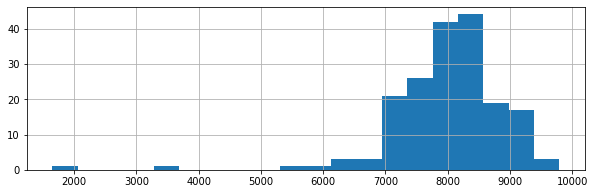

In [108]:
#  группировка по дате поездки
viz1 = df.groupby(df.pickup_datetime.dt.floor('d')).agg({'duration':'describe'})['duration']['count']
viz1.hist(figsize=(10,3), bins=20)

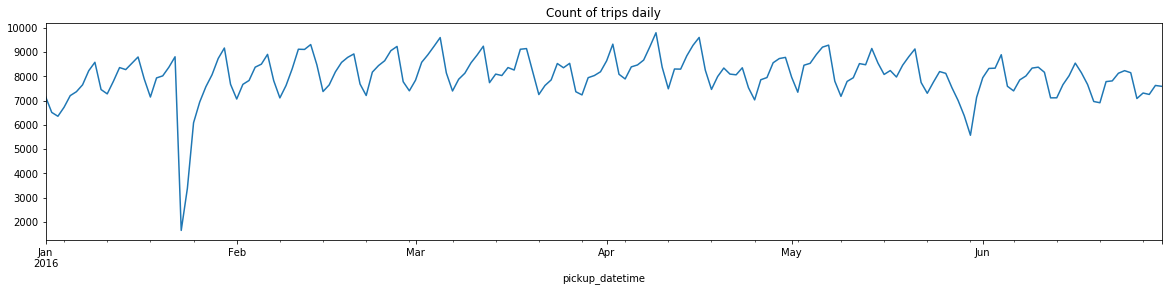

In [109]:
viz1.plot(figsize=(20,4), title='Count of trips daily')

In [124]:
# df.pickup_datetime.dt.weekday.plot(xlabelsize=15,
#                                        ylabelsize=12,
#                                        figsize = (10,4),
#                                        grid=False)
df.pickup_datetime.dt.day_name()
# x = df.pickup_datetime.dt.weekday
# x

0             Monday
1             Sunday
2            Tuesday
3          Wednesday
4           Saturday
             ...    
1458639       Friday
1458640       Sunday
1458641       Friday
1458642      Tuesday
1458643      Tuesday
Name: pickup_datetime, Length: 1458644, dtype: object

In [151]:
df['weekday'] = df.pickup_datetime.dt.weekday
df.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,duration,weekday
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,00:07:35,0
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,00:11:03,6
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,00:35:24,1
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,00:07:09,2
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,00:07:15,5


Text(0.5, 1.0, 'Amount of trip by weekday')

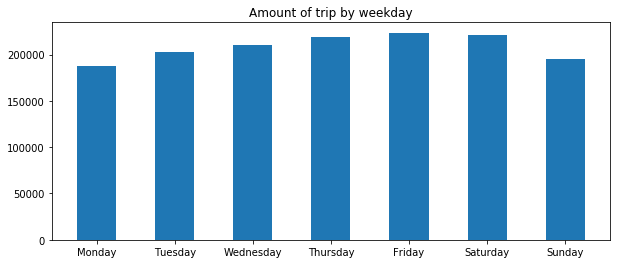

In [174]:
x = df.groupby('weekday').size()
plt.figure(figsize=(10,4))
plt.bar(x.index, height= x.values, width=0.5)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Amount of trips by weekday')

In [203]:
viz2 = df[['weekday', 'trip_duration']]
viz2 = viz2.loc[viz2.trip_duration < 5000].sort_values(by='trip_duration', ascending=False)
viz2

,weekday,trip_duration
895938,4,4999
276252,3,4998
1206467,6,4998
1446732,2,4998
43325,4,4997
...,...,...
1165514,6,1
1439166,6,1
1029695,4,1
269418,0,1


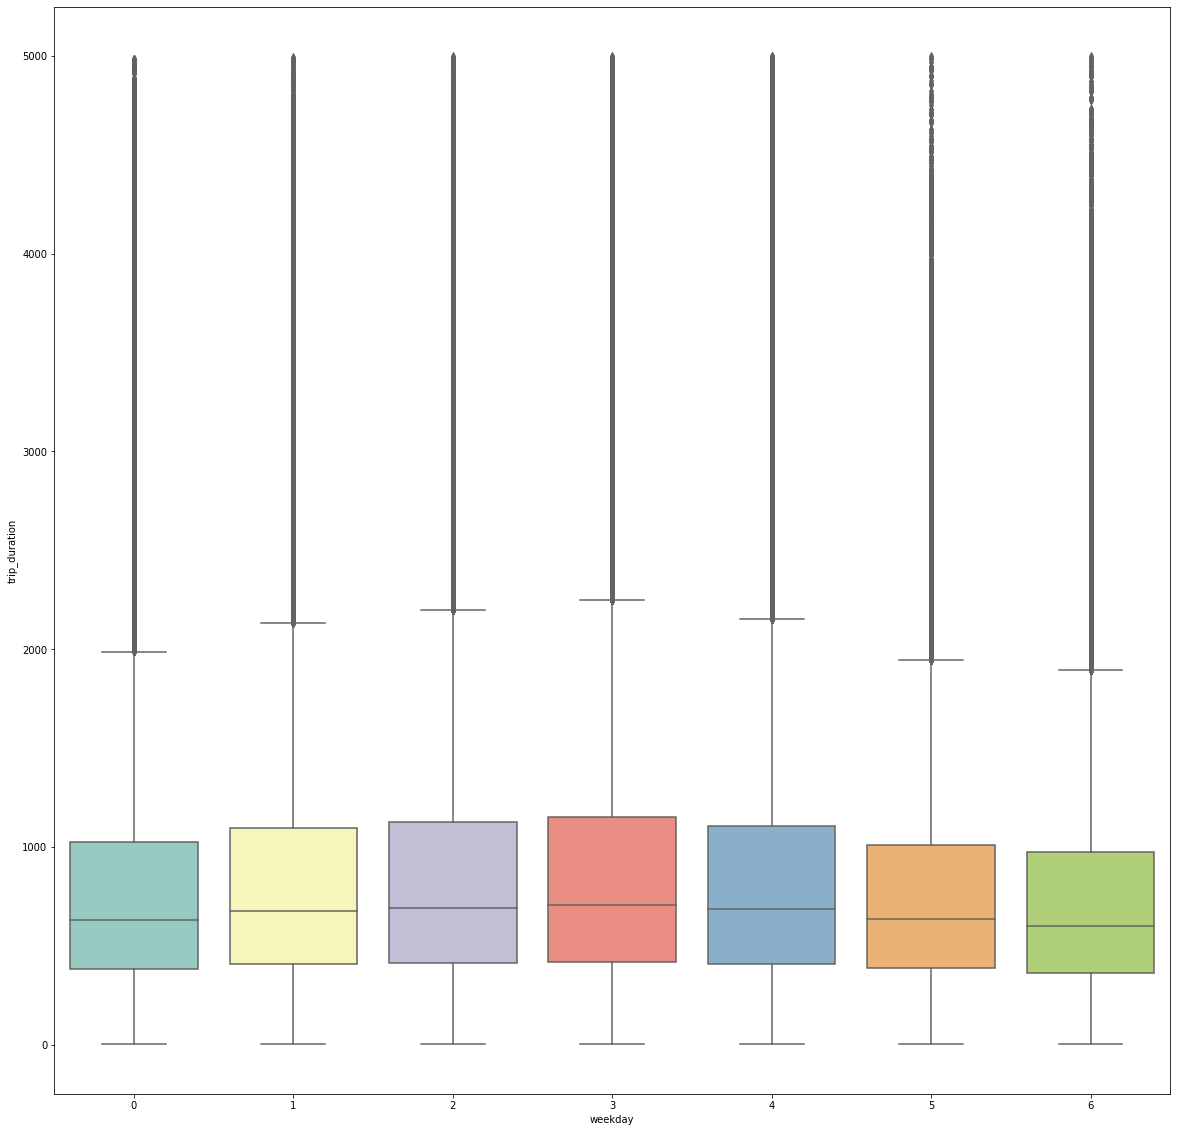

In [204]:
plt.figure(figsize=(20,20))
sns.boxplot(data=viz2, x='weekday', y='trip_duration', palette='Set3')

In [196]:
viz2 = viz2.loc[viz2.trip_duration < 86400].sort_values(by='trip_duration', ascending=False)

In [177]:
df.groupby('weekday')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
0,187418,00:14:57.947838,00:46:09.429212,00:00:01,00:06:20,00:10:30,00:17:07,0 days 23:59:52
1,202749,00:16:23.463124,02:00:35.007591,00:00:01,00:06:47,00:11:19,00:18:22,25 days 18:46:52
2,210136,00:16:15.450493,00:48:23.805145,00:00:01,00:06:56,00:11:34,00:18:53,0 days 23:59:26
3,218574,00:16:46.528653,00:51:40.383654,00:00:01,00:07:00,00:11:49,00:19:15,0 days 23:59:47
4,223533,00:16:30.224199,00:54:34.974477,00:00:01,00:06:50,00:11:26,00:18:32,0 days 23:59:50
5,220868,00:15:48.051175,02:36:01.206293,00:00:01,00:06:25,00:10:37,00:16:52,40 days 19:31:22
6,195366,00:15:01.639394,00:57:36.093919,00:00:01,00:06:04,00:10:02,00:16:18,0 days 23:59:29


In [181]:
# df.pickup_datetime.dt.day_name()

In [212]:
viz3 = df.pivot_table(index=[df.pickup_datetime.dt.day_name(), df.pickup_datetime.dt.hour], columns='passenger_count', values='id', aggfunc='size')
viz3

passenger_count                    0       1       2      3      4      5  \
pickup_datetime pickup_datetime                                             
Friday          0                NaN  6155.0  1323.0  379.0  203.0  460.0   
                1                NaN  3999.0   864.0  276.0  113.0  352.0   
                2                NaN  2728.0   602.0  180.0   96.0  219.0   
                3                1.0  2042.0   447.0  117.0   66.0  143.0   
                4                NaN  1599.0   324.0  108.0   41.0  141.0   
...                              ...     ...     ...    ...    ...    ...   
Wednesday       19               2.0  9863.0  1888.0  534.0  247.0  739.0   
                20               NaN  9463.0  1866.0  497.0  251.0  716.0   
                21               1.0  9492.0  1989.0  576.0  245.0  722.0   
                22               NaN  8665.0  1922.0  521.0  251.0  711.0   
                23               NaN  6895.0  1419.0  392.0  170.0  543.0   

passenger_count                      6   7    8   9  
pickup_datetime pickup_datetime                      
Friday          0                259.0 NaN  NaN NaN  
                1                199.0 NaN  1.0 NaN  
                2                124.0 NaN  NaN NaN  
                3                108.0 NaN  NaN NaN  
                4                100.0 NaN  NaN NaN  
...                                ...  ..  ...  ..  
Wednesday       19               420.0 NaN  NaN NaN  
                20               390.0 NaN  NaN NaN  
                21               413.0 NaN  NaN NaN  
                22               337.0 NaN  NaN NaN  
                23               316.0 NaN  NaN NaN  

[168 rows x 10 columns]

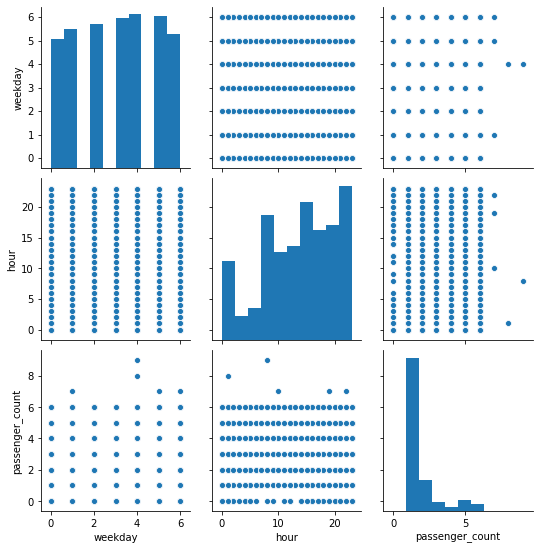

In [224]:
sns_plot = sns.pairplot(v[['weekday', 'hour', 'passenger_count']])
sns_plot

In [214]:
?sns.pairplot

In [223]:
v = df.loc[:,['pickup_datetime', 'passenger_count']]
v['hour'] = v.pickup_datetime.dt.hour
v['weekday'] = v.pickup_datetime.dt.weekday
# v[['weekday', 'hour', 'passenger_count']]
v

,pickup_datetime,passenger_count,hour,weekday
0,2016-03-14 17:24:55,1,17,0
1,2016-06-12 00:43:35,1,0,6
2,2016-01-19 11:35:24,1,11,1
3,2016-04-06 19:32:31,1,19,2
4,2016-03-26 13:30:55,1,13,5
...,...,...,...,...
1458639,2016-04-08 13:31:04,4,13,4
1458640,2016-01-10 07:35:15,1,7,6
1458641,2016-04-22 06:57:41,1,6,4
1458642,2016-01-05 15:56:26,1,15,1


In [226]:

# ?plt.scatter
df.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,duration,weekday
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,00:07:35,0
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,00:11:03,6
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,00:35:24,1
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,00:07:09,2
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,00:07:15,5


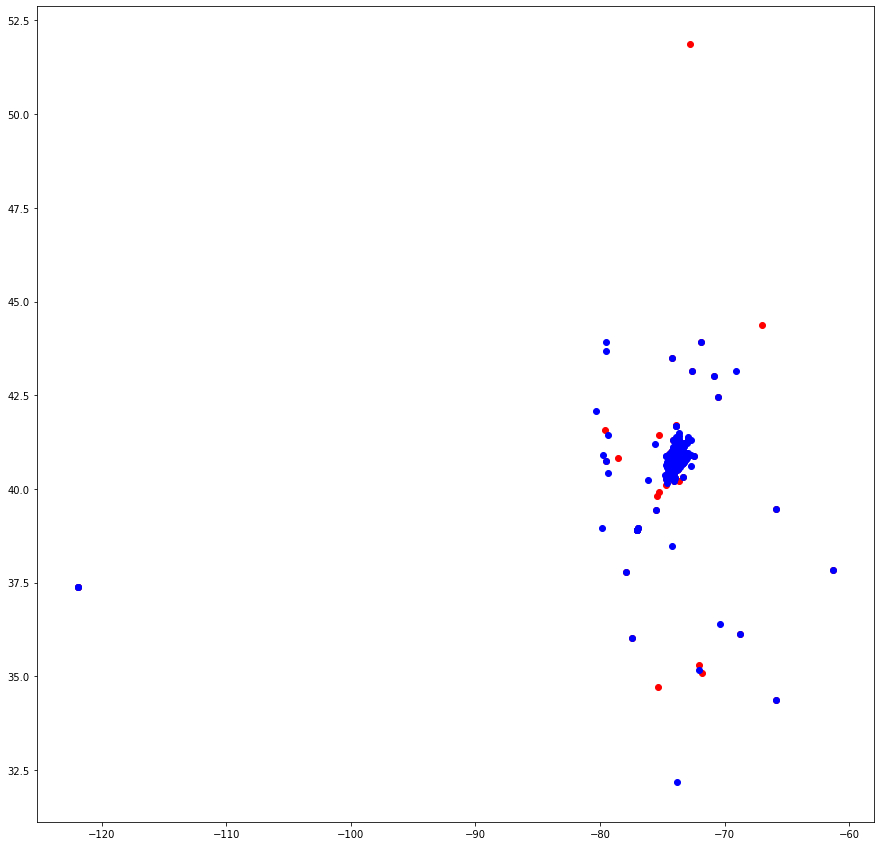

In [227]:
plt.figure(figsize=(15,15))
plt.scatter(df.pickup_longitude, df.pickup_latitude, color='red')
plt.scatter(df.dropoff_longitude, df.dropoff_latitude, color='blue')
# plt.show()
# Я понимаю, что 
# 1. для построения графиков по геоданным стоит использовать специальные библиотеки, 
# 2. без контекста график ниже понять невозможно
# Тем не менее, зная (представляя) карту Нью-Йорка, можно обратить внимание, что большинство поездок начинаются и заканчиваются  
# в центре Манхэттена. Разброс шире в координатах назначения поездки, слева далекий выброс в Нью-Джерси, справа точки в районе
# Бруклина и Квинс, точки выше - Гарлем или, вероятнее, Бронкс. Одна далекая точка вызова - сеевер штата.
# Здесь совпадают ли районы начала и окончания поездки.
# Зато однозначно встает вопрос о выбросах в разрезе длительности поездок, где некоторые поездки длятся 25 или 40 дней. 
# Также вопрос о большом количестве поездок в 1 секунду. 